In [1]:
%matplotlib inline
from sys import path
path.append("/Users/yangjunjie/work/bs-uhf/src/")

import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

from plot_utils import get_plot_data
from plot_utils import get_plot_style
from plot_utils import dump_h5_data

In [2]:
colors = ["fe4a49","2ab7ca","fed766","00cc66","8c5383"]
colors = ["#"+color for color in colors]

uhf_noci_dict = {
    "label": "NOCI-UHF",
    "color": colors[0], 
    "linestyle": "--", 
    "marker": "o", 
    "markersize": 4,
    "markevery": 1
}

ump2_noci_dict_1 = {
    "label": "NOCI-UMP2-1",
    "color": colors[1],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 1
}

ump2_noci_dict_2 = {
    "label": "NOCI-UMP2-2",
    "color": colors[4],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 1
}

In [3]:
%%capture
dump_key_list  = ["ene-nuc", "ene-fci", "s2-fci"]
dump_key_list += [ "ene-uhf-bs[0]",  "s2-uhf-bs[0]"]
dump_key_list += ["ene-ump2-bs[0]", "s2-ump2-bs[0]"]
dump_key_list += ["ene-ump2-bs[1]", "s2-ump2-bs[1]"]
dump_key_list += ["ene-noci-uhf",     "s2-noci-uhf"]
dump_key_list += ["ene-noci-ump2-1",  "s2-noci-ump2-1"]
dump_key_list += ["ene-noci-ump2-2",  "s2-noci-ump2-2"]
data_dict = dump_h5_data("../data/h4-td-sto-3g.h5", dump_key_list=dump_key_list);

x         = data_dict["x"]
ene_rhf   = data_dict["ene-rhf"] + data_dict["ene-nuc"]
ene_rmp2  = data_dict["ene-rmp2"] + data_dict["ene-nuc"]
ene_rcisd = data_dict["ene-rcisd"] + data_dict["ene-nuc"]
ene_uhf   = data_dict["ene-uhf-bs[0]"] + data_dict["ene-nuc"]
ene_ump2  = data_dict["ene-ump2-bs[0]"] + data_dict["ene-nuc"]
ene_fci   = data_dict["ene-fci"] + data_dict["ene-nuc"]
ene_noci_uhf    = data_dict["ene-noci-uhf"] + data_dict["ene-nuc"]
ene_noci_ump2_1 = data_dict["ene-noci-ump2-1"] + data_dict["ene-nuc"]
ene_noic_ump2_2 = data_dict["ene-noci-ump2-2"] + data_dict["ene-nuc"]

In [4]:
colors = ["fe4a49","2ab7ca","fed766","00cc66","8c5383"]
colors = ["#"+color for color in colors]

uhf_noci_dict = {
    "label": "NOCI-UHF",
    "color": colors[0], 
    "linestyle": "--", 
    "marker": "o", 
    "markersize": 4,
    "markevery": 2
}

ump2_noci_dict_1 = {
    "label": "NOCI-UMP2-1",
    "color": colors[1],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 2
}

ump2_noci_dict_2 = {
    "label": "NOCI-UMP2-2",
    "color": colors[3],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 2
}

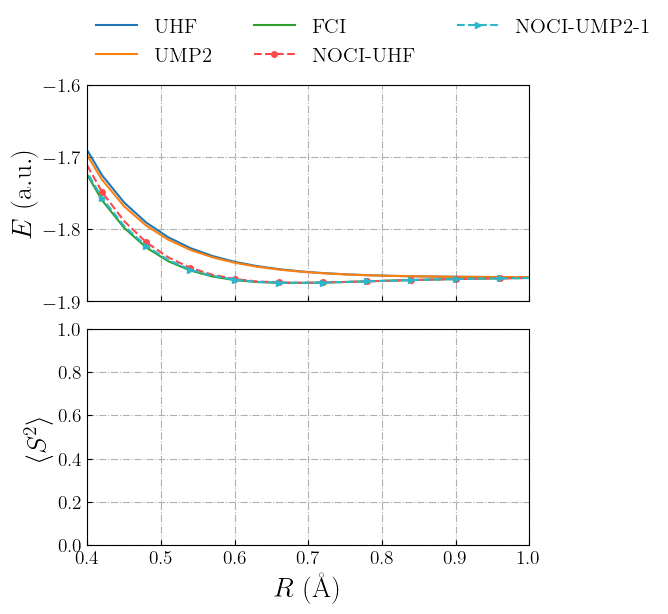

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(6.5, 6.5), sharex=True)

ax = axs[0]
ax.plot(x, ene_uhf,  label="UHF", )
ax.plot(x, ene_ump2, label="UMP2",)
ax.plot(x, ene_ump2, label="UMP2",)
ax.plot(x, ene_fci,  label="FCI", )
ax.plot(x, ene_noci_uhf, **uhf_noci_dict)
ax.plot(x, ene_noci_ump2_1, **ump2_noci_dict_1)
ax.set_xlim(0.4, 1,6)
ax.set_ylim(-1.9, -1.6)

ax.set_ylabel(r"$E$ ($\mathrm{a.u.}$)")
ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=3
    )
ax.grid(True, linestyle='-.')

ax = axs[1]
# s2_uhf_list = data_dict["s2_uhf"][:, 1]
# s2_rhf_list = data_dict["s2_rhf"][:, 1]

# ax.plot(bond_length_list, s2_uhf_list, label="UHF")
# ax.plot(bond_length_list, s2_rhf_list, label="RHF")
# ax.plot(bond_length_list, s2_rhf_list, label="FCI-S$_0$")
# ax.plot(bond_length_list, [2.0 for _ in bond_length_list], label=r"FCI-T$_1$")
# ax.plot(bond_length_list, data_dict["s2_noci_uhf"][:, 1], **uhf_noci_dict)
# ax.plot(bond_length_list, data_dict["s2_noci_ump2_1"][:, 1], label=r"FCI-T$_1$")

# # ax.plot(bond_length_list, s2_rhf_t_list, label="RHF")
# ax.plot(bond_length_list, s2_fci_s_list, label="FCI")
# ax.plot(bond_length_list, s2_fci_t_list, label="FCI")

# ax.set_xlim(0.3, 1.8)
# ax.set_ylim(-0.04, 2.04)
ax.grid(True, linestyle='-.')

ax.set_ylabel(r"$\langle S^2 \rangle$")
ax.set_xlabel(r"$R$ ($\mathrm{\AA}$)")
fig.tight_layout(w_pad=0.4, h_pad=0.4)
fig.savefig("/Users/yangjunjie/Downloads/h2-bs-noci-uhf.png", dpi=600)